In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West


In [3]:
round(indian_food.cov(),2)

,prep_time,cook_time
prep_time,5812.70,418.93
cook_time,418.93,2442.51


In [4]:
# diagonal of variances
(indian_food['prep_time'].std())**2

5812.7025

In [5]:
(indian_food['cook_time'].std())**2

2442.5054773693014

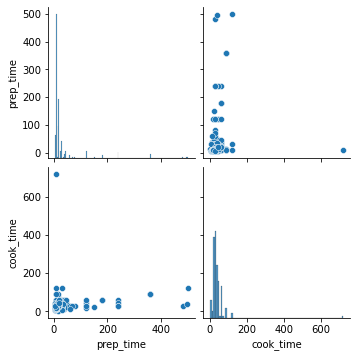

In [6]:
sns.pairplot(indian_food)
plt.show()

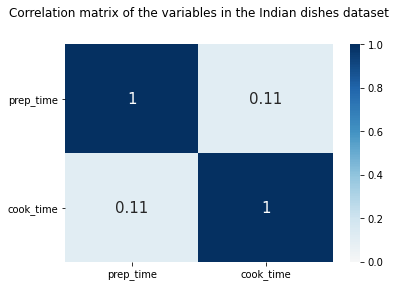

In [7]:
sns.heatmap(round(indian_food.corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=0, vmax=1,
            annot=True, 
            annot_kws={
                'fontsize':15
            })

plt.title("Correlation matrix of the variables in the Indian dishes dataset", y=1.1)
plt.yticks(rotation=360)

plt.show()

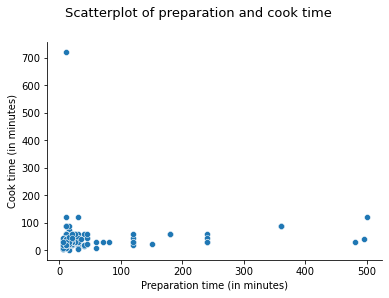

In [8]:
# use the function regplot to make a scatterplot
plt.figure()
sns.scatterplot(x=indian_food["prep_time"], y=indian_food["cook_time"])

plt.title("Scatterplot of preparation and cook time", fontsize=13, y=1.09, x=0.45) #, loc='left'
plt.xlabel("Preparation time (in minutes)")
plt.ylabel("Cook time (in minutes)")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

### Transformation prep_time

In [9]:
indian_food['log_prep_time'] = np.log10(indian_food['prep_time'])
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,log_prep_time
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,1.653213
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,1.903090


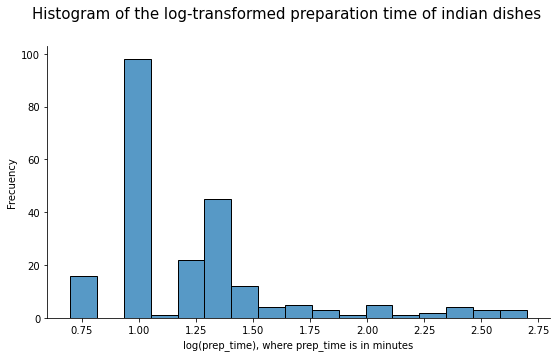

In [10]:
plt.figure(figsize=(9,5)) #figsize=(9,5)

sns.histplot(indian_food, x="log_prep_time", bins= 17) #, bins= 50

plt.title("Histogram of the log-transformed preparation time of indian dishes", fontsize=15, loc='left', y=1.08, x=-0.03)
plt.xlabel("log(prep_time), where prep_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames
#plt.xlim(0, 510)

plt.show()

### Transformation cook_time

In [11]:
indian_food['log_cook_time'] = np.log10(indian_food['cook_time'])
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,log_prep_time,log_cook_time
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,1.653213,1.397940
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,1.903090,1.477121


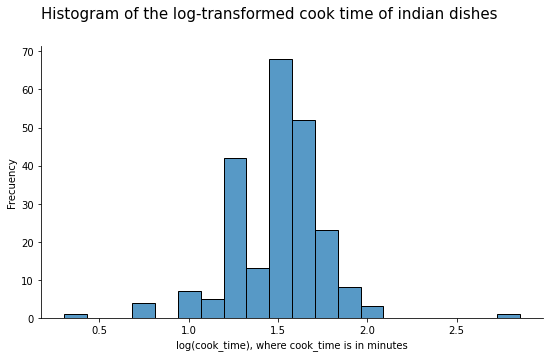

In [12]:
plt.figure(figsize=(9,5))

sns.histplot(indian_food, x="log_cook_time", bins= 20) #, bins= 15

plt.title("Histogram of the log-transformed cook time of indian dishes", fontsize=15, loc='left', y=1.08)
plt.xlabel("log(cook_time), where cook_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

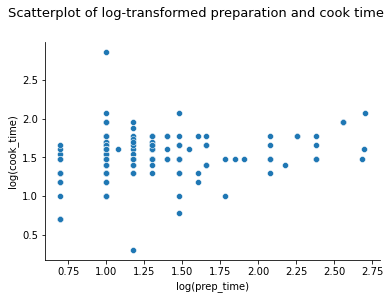

In [13]:
# use the function regplot to make a scatterplot
plt.figure()
sns.scatterplot(x=indian_food["log_prep_time"], y=indian_food["log_cook_time"])

plt.title("Scatterplot of log-transformed preparation and cook time", fontsize=13, y=1.09, x=0.45) #, loc='left'
plt.xlabel("log(prep_time)")
plt.ylabel("log(cook_time)")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

In [14]:
indian_food[['log_cook_time', 'log_prep_time']].corr()

,log_cook_time,log_prep_time
log_cook_time,1.000000,0.263206
log_prep_time,0.263206,1.000000


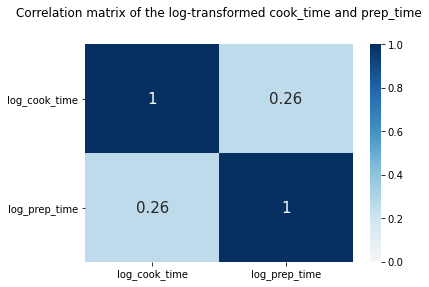

In [15]:
sns.heatmap(round(indian_food[['log_cook_time', 'log_prep_time']].corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=0, vmax=1,
            annot=True, 
            annot_kws={
                'fontsize':15
            })

plt.title("Correlation matrix of the log-transformed cook_time and prep_time", y=1.1)
plt.yticks(rotation=360)

plt.show()

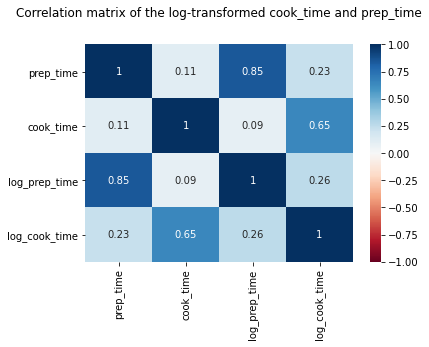

In [16]:
sns.heatmap(round(indian_food.corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=-1, vmax=1,
            annot=True)

plt.title("Correlation matrix of the log-transformed cook_time and prep_time", y=1.1)
plt.yticks(rotation=360)

plt.show()

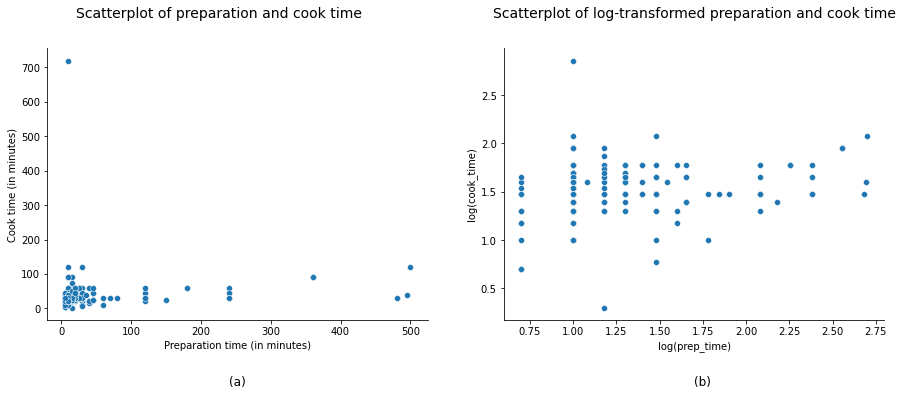

In [17]:
plt.figure(figsize=(15,5))
#plt.subplot(n of rows, n of columns, plot number)


#plot 1
plt.subplot(1, 2, 1)
ax = sns.scatterplot(x=indian_food["prep_time"], y=indian_food["cook_time"])

plt.title("Scatterplot of preparation and cook time", fontsize=14, y=1.09, x=0.45) #, loc='left'
plt.xlabel("Preparation time (in minutes)")
plt.ylabel("Cook time (in minutes)")
ax.text(x=240, y=-225, s='(a)', fontsize=12) # agrega texto
sns.despine(bottom = False, left = False) # remove frames

#plot 2
plt.subplot(1, 2, 2)
ax1 = sns.scatterplot(x=indian_food["log_prep_time"], y=indian_food["log_cook_time"])

plt.title("Scatterplot of log-transformed preparation and cook time", fontsize=14, y=1.09, x=0.5) #, loc='left'
plt.xlabel("log(prep_time)")
plt.ylabel("log(cook_time)")
ax1.text(x=1.7, y=-0.5, s='(b)', fontsize=12) # agrega texto
sns.despine(bottom = False, left = False) # remove frames



plt.show()

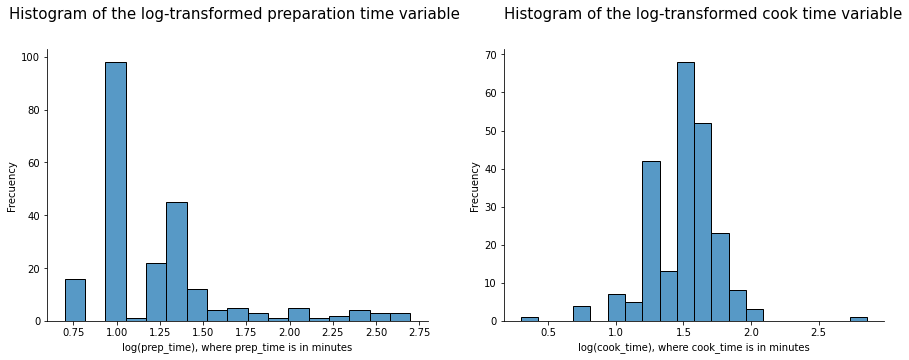

In [18]:
plt.figure(figsize=(15,5))
#plt.subplot(n of rows, n of columns, plot number)


#plot 1
plt.subplot(1, 2, 1)

sns.histplot(indian_food, x="log_prep_time", bins= 17) #, bins= 50

plt.title("Histogram of the log-transformed preparation time variable", fontsize=15, loc='left', y=1.09, x=-0.1)
plt.xlabel("log(prep_time), where prep_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames

#plot 2
plt.subplot(1, 2, 2)
sns.histplot(indian_food, x="log_cook_time", bins= 20) #, bins= 15

plt.title("Histogram of the log-transformed cook time variable", fontsize=15, loc='left', y=1.09)
plt.xlabel("log(cook_time), where cook_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames



plt.show()

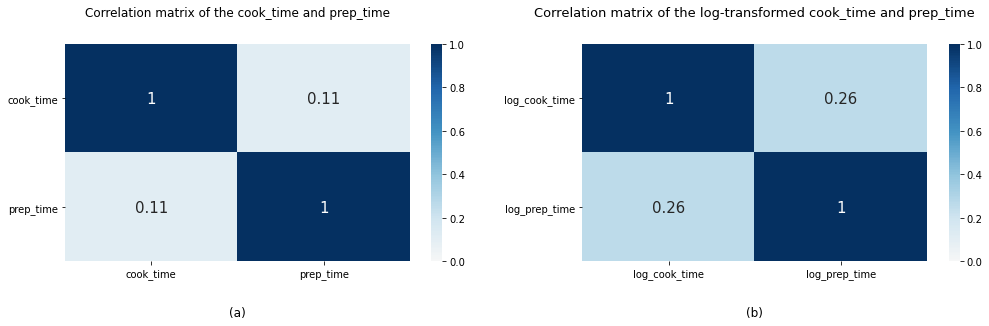

In [34]:
plt.figure(figsize=(17,4))
#plt.subplot(n of rows, n of columns, plot number)


#plot 1
plt.subplot(1, 2, 1)

ax = sns.heatmap(round(indian_food[['cook_time', 'prep_time']].corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=0, vmax=1,
            annot=True, 
            annot_kws={
                'fontsize':15
            })

plt.title("Correlation matrix of the cook_time and prep_time", y=1.1)
plt.yticks(rotation=360)
ax.text(x=0.95, y=2.5, s='(a)', fontsize=12) # agrega texto

#plot 2
plt.subplot(1, 2, 2)

ax1 = sns.heatmap(round(indian_food[['log_cook_time', 'log_prep_time']].corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=0, vmax=1,
            annot=True, 
            annot_kws={
                'fontsize':15
            })

plt.title("Correlation matrix of the log-transformed cook_time and prep_time", y=1.1, fontsize=13)
plt.yticks(rotation=360)
ax1.text(x=0.95, y=2.5, s='(b)', fontsize=12) # agrega texto



plt.show()